<h1 align="center">  
  <br>
  <a href="https://github.com/santiagoahl/RNA-taxonomy-prediction"><img src="https://images.unsplash.com/photo-1643780668909-580822430155?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2064&q=80" alt="WHR" width="800"></a>
  <br>
  <b>RNA Taxonomy Classification</b>
  </br>
</h1>

<h4 align="center">A Random Forest Multiclass classifier built in scikit-learn using Markov Chains. 
</h4>

<p align="center">
  <a href='https://github.com/shivamkapasia0' target="_blank"><img alt='scikit-learn' src='https://img.shields.io/badge/scikit-learn-100000?style=for-the-badge&logo=scikit-learn&logoColor=FFFFFF&labelColor=FF6A00&color=1882EA'/></a> <a href='https://numpy.org/' target="_blank"><img alt='Numpy' src='https://img.shields.io/badge/Numpy-100000?style=for-the-badge&logo=Numpy&logoColor=4C16ED&labelColor=60A7FD&color=3566ED'/></a> <a href='https://joblib.readthedocs.io/en/latest/' target="_blank"><img alt='joblib' src='https://img.shields.io/badge/Joblib-100000?style=for-the-badge&logo=joblib&logoColor=EA1616&labelColor=BD9B7A&color=000000'/></a> <a href='https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwi0tfXl3Iv7AhUVTDABHZOWB-AQFnoECBEQAQ&url=https%3A%2F%2Fwww.json.org%2F&usg=AOvVaw3WUMhwoap01T91PbRZTt_w' target="_blank"><img alt='json' src='https://img.shields.io/badge/Json-100000?style=for-the-badge&logo=json&logoColor=3C3B3B&labelColor=D7CEC7&color=D7D7D7'/></a>
</p>

# Content:

>[Libraries & Modules](#scrollTo=VFc9ZwgmW78b)

>[Data import](#scrollTo=1H8tdfrlW78c)

>[Dataset visualization](#scrollTo=6xbsPJlQW78g)

>[Codons handling](#scrollTo=x5TAu7ZAW78i)

>[Markov chains](#scrollTo=SnKnLz4rW78j)

>>[Splitting data into taxonomies](#scrollTo=dFaRPJo-6CL6)

>>[Transition matrices](#scrollTo=Bs2JV5Xj6GYh)

>>[Markov Chain Viz](#scrollTo=W7L8WQQaMfZv)

>[New Dataset](#scrollTo=Qf8wrPrl9Rxt)

>>[New dataset Normalization](#scrollTo=8GV8ryLxbKmZ)

>>[Data viz](#scrollTo=1KMLEnLeiyaD)

>[SMOTE: Balancing the data](#scrollTo=udhRApjNRi9M)

>[Machine Learning Model](#scrollTo=XMTPGOM8XdQs)

>>[Training: Grid Search](#scrollTo=VZagRDcg1pFK)

>>>[Random Forest](#scrollTo=zDLTBr9_Xfeg)

>>>[X Gradient Boost](#scrollTo=mk9ePmgNATpy)

>>[Testing](#scrollTo=Cqte9ftKvs2h)

>[Results](#scrollTo=tffdQr31qJbK)

>>[Learning curves](#scrollTo=sLO5dTYIxrTY)

>>[Confusion Matrix](#scrollTo=dBYn7NWrW-bB)

>[Model Selection](#scrollTo=-e0GTSg6Ypqr)

>[Model export](#scrollTo=Kx0koTYOvvgF)

>[Model import](#scrollTo=Ivb-R2d00_d5)

>[DEMO](#scrollTo=c8B893NFq1GI)



# Libraries & Modules

In [10]:
# Libraries

  # Data manipulation
import numpy as np 
from scipy.sparse import csr_matrix
import pandas as pd 
from random import choice 

  #Data-viz 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx 
from sklearn.tree import plot_tree

  # Scikit-Learn 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, recall_score, accuracy_score, log_loss, average_precision_score
from imblearn.over_sampling import SMOTE

 # X-Gradient Boost
from xgboost import XGBClassifier, plot_importance

  # File handling 
import pickle
import json
import joblib
from google.colab import drive
import warnings

In [ ]:
warnings.filterwarnings('ignore') 

In [11]:
drive.mount('/content/drive')
#drive.flush_and_unmount()

Mounted at /content/drive


In [12]:
#Modules 

%run "/content/drive/MyDrive/RNA-taxonomy-detection/Notebook/functions.py"
%run "/content/drive/MyDrive/RNA-taxonomy-detection/Notebook/matrix_norms.py"
%run "/content/drive/MyDrive/RNA-taxonomy-detection/Notebook/model_viz.py"

# Data import

In [ ]:
path = '/content/drive/MyDrive/RNA-taxonomy-detection/Dataset/secuencias.csv'
df_names = ['Taxonomy', 'Sequence']
df_sequences = pd.read_csv(path,header=0,names=df_names)
df_sequences

,Taxonomy,Sequence
0,Orthomyxoviridae,AGCAATCACAATCTCTTAACCAGTTAAAATGTCATTTGAGGCATAC...
1,Orthomyxoviridae,AGCAATCACAATCTCTTCACTCTTCAATTTGTTCGATGGCCCAATT...
2,Orthomyxoviridae,AGCAATCACATCTCACATTTCGTCTAAATTTGTCTAGTTGAACCCG...
3,Orthomyxoviridae,AGCAATCACATTCTCTTTTCCTTAACAATGATTGTCTTGTGCTTAC...
4,Orthomyxoviridae,AGCAATCACAGCTCAGTGATCGAGACAATTAAACATTCCAACCATG...
...,...,...
4995,Coronaviridae,ACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACT...
4996,Coronaviridae,ACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACT...
4997,Coronaviridae,ACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACT...
4998,Coronaviridae,CCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTT...


In [ ]:
taxonomies = df_sequences['Taxonomy'].drop_duplicates()
print(len(taxonomies))

19


In [ ]:
taxonomies.to_csv('/content/drive/MyDrive/RNA-taxonomy-detection/Results/processed_data/Taxonomies.csv')

In [ ]:
print(len(df_sequences['Sequence'][3400]))

29823


In [ ]:
total = np.sum([len(df_sequences['Sequence'][i]) for i in range(len(df_sequences))])//len(df_sequences)
print(total)

16544


In [ ]:
len(df_sequences)

5000

# Dataset visualization

In [ ]:
x = ['T', 'G', 'A', 'C']

In [ ]:
def contar(table):
    nT = 0
    nG = 0
    nA = 0
    nC = 0
    for row in table.index:
        nT += table['Sequence'][row].count("T")
        nG += table['Sequence'][row].count("G")
        nA += table['Sequence'][row].count("A")
        nC += table['Sequence'][row].count("C")

    count = [nT, nG, nA, nC]
    return count

In [ ]:
def hist(count):
    plt.figure(figsize=(5,3))
    plt.bar(x, count, color='red')
    plt.show()

In [ ]:
contar(df[df['Taxonomy']=='Orthomyxoviridae'])

[108526, 109855, 153348, 84105]

In [ ]:
table = df[df['Taxonomy']=='Orthomyxoviridae']
print(table.index[13])

138


In [ ]:
taxonomies = df['Taxonomy'].drop_duplicates()
list(taxonomies)

In [ ]:
tables = [df[df['Taxonomy']==taxonomy] for taxonomy in taxonomies]
tables;

In [ ]:
for table in tables:
    print(table['Taxonomy'].head(1))
    count = contar(table)
    hist(count)

# Codons handling

In [ ]:
codon_data = []

for chain in df_sequences['Sequence']:
    codons = compute_codons(chain)
    codon_data.append(codons)

In [ ]:
pd.Series(codon_data[0])

In [ ]:
codons = list(set(codon_data[0]))
codons

In [ ]:
print(len(list(set(codon_data[1000]))))

64


In [ ]:
def contar_codons(table, codons):
    counts = [0]*len(codons)
    for row in table.index:
      for j in range(len(codons)):
        codon = codons[j]
        counts[j] += table['Sequence'][row].count(codon)
    return counts

In [ ]:
def hist(x, count, name):
    plt.style.use('bmh')
    plt.figure(figsize=(7, 15))
    plt.title(name, color='yellow')
    plt.xlabel('Frequency', color='yellow')
    plt.ylabel('Codon', color='yellow')
    plt.tick_params(axis="x", colors="#5DCD99")      # x tick labels
    plt.tick_params(axis="y", colors="#5DCD99") 
    plt.barh(x, count, color='#24AA6B', edgecolor='blue')
    plt.show()

In [ ]:
contar_codons(df_sequences[df_sequences['Taxonomy']=='Orthomyxoviridae'], codons)

In [ ]:
table = df_sequences[df_sequences['Taxonomy']=='Orthomyxoviridae']
print(table.index[13])

138


In [ ]:
taxonomies = df_sequences['Taxonomy'].drop_duplicates()
taxonomies[0]

'Orthomyxoviridae'

In [ ]:
tables = [df_sequences[df_sequences['Taxonomy']==taxonomy] for taxonomy in taxonomies]
tables;

In [ ]:
for taxonomy in taxonomies:
    table = df_sequences[df_sequences['Taxonomy']==taxonomy]
    name = taxonomy
    count = contar_codons(table, codons)
    hist(codons, count, name)

In [ ]:
df_sequences['Codons'] = codon_data

In [ ]:
df_sequences.head(5)

,Taxonomy,Sequence,Codons
0,Orthomyxoviridae,AGCAATCACAATCTCTTAACCAGTTAAAATGTCATTTGAGGCATAC...,"[AGC, AAT, CAC, AAT, CTC, TTA, ACC, AGT, TAA, ..."
1,Orthomyxoviridae,AGCAATCACAATCTCTTCACTCTTCAATTTGTTCGATGGCCCAATT...,"[AGC, AAT, CAC, AAT, CTC, TTC, ACT, CTT, CAA, ..."
2,Orthomyxoviridae,AGCAATCACATCTCACATTTCGTCTAAATTTGTCTAGTTGAACCCG...,"[AGC, AAT, CAC, ATC, TCA, CAT, TTC, GTC, TAA, ..."
3,Orthomyxoviridae,AGCAATCACATTCTCTTTTCCTTAACAATGATTGTCTTGTGCTTAC...,"[AGC, AAT, CAC, ATT, CTC, TTT, TCC, TTA, ACA, ..."
4,Orthomyxoviridae,AGCAATCACAGCTCAGTGATCGAGACAATTAAACATTCCAACCATG...,"[AGC, AAT, CAC, AGC, TCA, GTG, ATC, GAG, ACA, ..."


# Markov chains

## Splitting data into taxonomies

In [ ]:
tax_data, cod_data = {}, {}

In [ ]:
for taxonomy in taxonomies:
  tax_data[taxonomy], cod_data[taxonomy] = get_data(taxonomy, df_sequences)

In [ ]:
nucleotids = ['A', 'C', 'G', 'T']

In [ ]:
codons = [str(i)+str(j)+str(j) for i in nucleotids for j in nucleotids for k in nucleotids]

## Transition matrices

In [ ]:
matrices_dataset = {}
t=1
for taxonomy in taxonomies:
  print(t,'\n')
  t=t+1
  data = tax_data[taxonomy]
  codons = cod_data[taxonomy]
  matrices_dataset[taxonomy] = taxonomy_transition_matrices(data, codons)

In [ ]:
with open('matrices_dataset.pkl', 'wb') as f:
    pickle.dump(matrices_dataset, f)

In [ ]:
list_matrices = {}
for tax in taxonomies:
  list_matrices[tax] = [matrix.tolist() for matrix in matrices_dataset[tax]]

In [ ]:
with open('matrices_dataset.json', 'w') as fp:
    json.dump(list_matrices, fp)

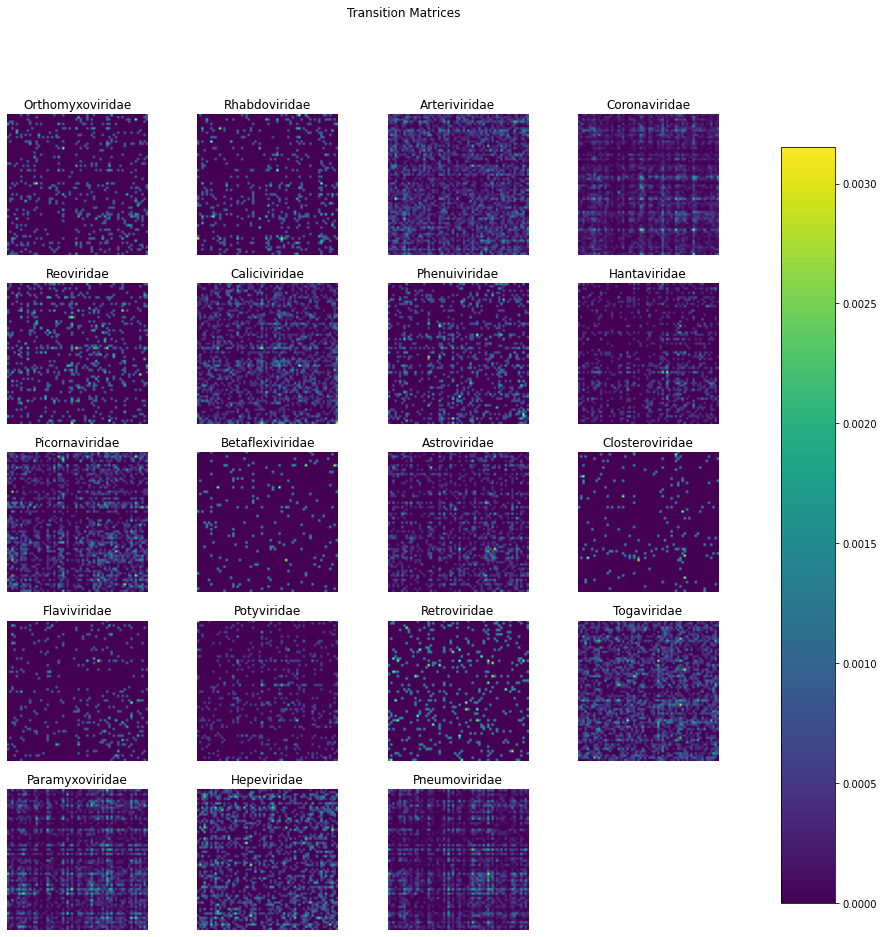

In [ ]:
plot_tr_matrices(new_data) # new_data is defined in the following code cell 

## Markov Chain Viz

In [ ]:
matrix_example = pd.crosstab(new_data['Orthomyxoviridae'][0], columns=codons)

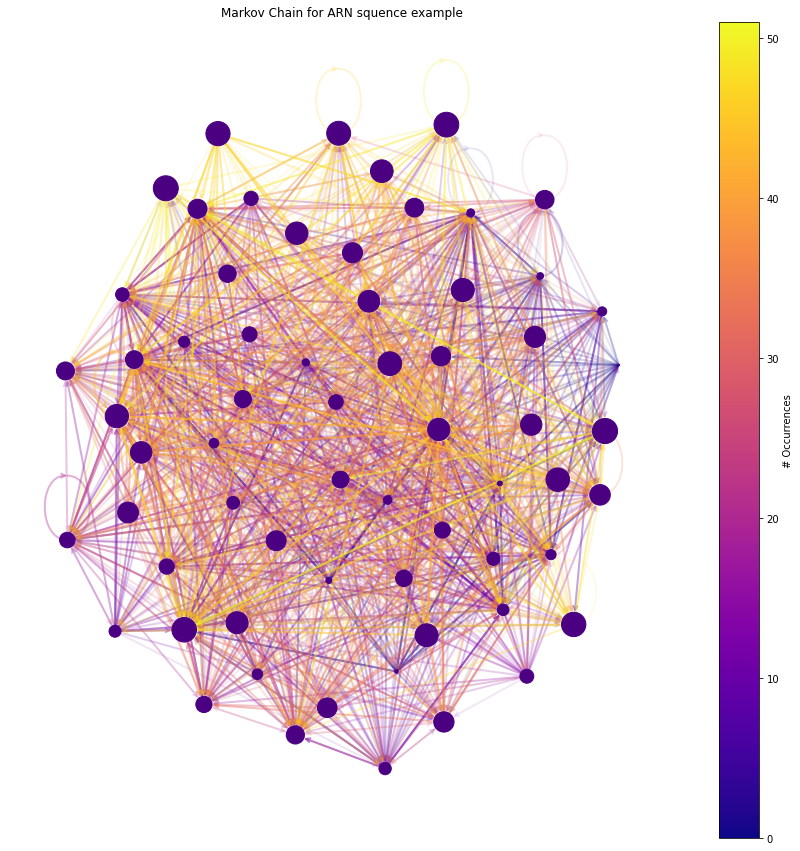

In [ ]:
plot_markov_chain(matrix_example)

# New Dataset 


In [ ]:
with open('/content/drive/MyDrive/RNA-taxonomy-detection/Results/processed_data/matrices_dataset.json') as file:
    new_data = json.load(file)

In [ ]:
new_data = normalize_data(new_data, 0, 0.0232)
new_dict = {}

In [ ]:
for key in new_data.keys():
  new_dict[key] = metrics(new_data[key])

In [ ]:
df = pd.DataFrame(columns=['Frobenius Norm', 'Nuclear Norm', 'Infty Norm', 'Neg Infty Norm', 'Neg L1 Norm', 'L1 Norm', 'Neg L2 Norm', 'L2 Norm']+['eig '+str(i+1) for i in range(10)]+['Taxonomy'])

In [ ]:
for taxonomy in taxonomies:
  for j in range(len(new_dict[taxonomy])):
    new_row = new_dict[taxonomy][j]+[taxonomy]
    df.loc[len(df)] = new_row

In [ ]:
tax_col = df['Taxonomy']

In [ ]:
tax_col

0       Orthomyxoviridae
1       Orthomyxoviridae
2       Orthomyxoviridae
3       Orthomyxoviridae
4       Orthomyxoviridae
              ...       
4995       Pneumoviridae
4996       Pneumoviridae
4997       Pneumoviridae
4998       Pneumoviridae
4999       Pneumoviridae
Name: Taxonomy, Length: 5000, dtype: object

In [ ]:
df.to_csv('/content/drive/MyDrive/RNA-taxonomy-detection/Dataset/new_data.csv')

In [ ]:
df.head()

,Frobenius Norm,Nuclear Norm,Infty Norm,Neg Infty Norm,Neg L1 Norm,L1 Norm,Neg L2 Norm,L2 Norm,eig 1,eig 2,eig 3,eig 4,eig 5,eig 6,eig 7,eig 8,eig 9,eig 10,Taxonomy
0,1.788372,10.166032,2.415511,0.053678,0.053678,2.415511,9.216497e-04,1.008877,0.007231,0.015300,0.015300,0.020864,0.026416,3.210225e-02,3.210225e-02,3.233439e-02,0.032334,0.043790,Orthomyxoviridae
1,1.753827,10.266756,1.949402,0.108300,0.108300,1.949402,2.701283e-05,0.980939,0.001386,0.007452,0.010456,0.010456,0.018331,2.637330e-02,4.064168e-02,4.064168e-02,0.043808,0.048709,Orthomyxoviridae
2,2.014137,11.945518,1.935561,0.000000,0.000000,1.935561,3.214702e-18,0.971374,0.000000,0.016957,0.016957,0.017012,0.017012,2.462541e-02,2.462541e-02,3.644598e-02,0.036446,0.049043,Orthomyxoviridae
3,2.022085,11.985094,1.602359,0.000000,0.000000,1.602359,3.544304e-18,0.953578,0.000000,0.000000,0.000000,0.011503,0.011503,1.631025e-02,1.631025e-02,2.680638e-02,0.026806,0.032782,Orthomyxoviridae
4,3.305386,20.800448,1.993223,0.000000,0.000000,1.993223,1.831376e-18,1.035848,0.000000,0.000000,0.000000,0.000000,0.000000,1.395865e-16,1.968035e-09,1.968035e-09,0.084056,0.084056,Orthomyxoviridae


## New dataset Normalization

In [ ]:
scaler = MinMaxScaler()
scaler.fit_transform(df.drop(['Taxonomy'], axis=1))

In [ ]:
df = pd.DataFrame(scaler.fit_transform(df.drop(['Taxonomy'], axis=1)), columns=['Frobenius Norm', 'Nuclear Norm', 'Infty Norm', 'Neg Infty Norm', 'Neg L1 Norm', 'L1 Norm', 'Neg L2 Norm', 'L2 Norm']+['eig '+str(i+1) for i in range(10)])
df['Taxonomy'] = tax_col

In [ ]:
scaler.data_max_

array([3.43741890e+00, 2.10976203e+01, 4.55665025e+00, 3.73154131e-01,
       3.73154131e-01, 4.55665025e+00, 6.09212829e-03, 1.83130135e+00,
       2.93818320e-02, 3.68116170e-02, 6.25110435e-02, 6.25110435e-02,
       7.39450659e-02, 9.67528899e-02, 9.67528899e-02, 1.00604059e-01,
       1.00604059e-01, 1.04286095e-01])

In [ ]:
#df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Frobenius Norm,Nuclear Norm,Infty Norm,Neg Infty Norm,Neg L1 Norm,L1 Norm,Neg L2 Norm,L2 Norm,eig 1,eig 2,eig 3,eig 4,eig 5,eig 6,eig 7,eig 8,eig 9,eig 10,Taxonomy
0,0.350555,0.371094,0.381855,0.143849,0.143849,0.381855,1.512853e-01,0.246963,0.246101,0.415639,0.244762,0.333769,0.357234,3.317963e-01,3.317963e-01,3.214024e-01,0.321402,0.419899,Orthomyxoviridae
1,0.336950,0.376888,0.247290,0.290229,0.290229,0.247290,4.434055e-03,0.221382,0.047178,0.202435,0.167272,0.167272,0.247896,2.725841e-01,4.200565e-01,4.039766e-01,0.435445,0.467070,Orthomyxoviridae
2,0.439468,0.473469,0.243294,0.000000,0.000000,0.243294,5.276812e-16,0.212624,0.000000,0.460631,0.271257,0.272141,0.230061,2.545186e-01,2.545186e-01,3.622715e-01,0.362271,0.470271,Orthomyxoviridae
3,0.442598,0.475746,0.147099,0.000000,0.000000,0.147099,5.817842e-16,0.196329,0.000000,0.000000,0.000000,0.184010,0.155557,1.685764e-01,1.685764e-01,2.664542e-01,0.266454,0.314346,Orthomyxoviridae
4,0.948002,0.982903,0.259941,0.000000,0.000000,0.259941,3.006136e-16,0.271658,0.000000,0.000000,0.000000,0.000000,0.000000,1.442712e-15,2.034083e-08,1.956218e-08,0.835512,0.806013,Orthomyxoviridae


In case you have dowloaded the data previously:

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/RNA-taxonomy-detection/Dataset/new_data.csv')

## Data viz

Se contrastó la distribución de los datos de todas las métricas matriciales. Cada color corresponde a una taxonomía. 

In [ ]:
sns.pairplot(data=df, hue='Taxonomy', corner=True)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# SMOTE: Balancing the data

This technique will be applied sice the class (Coronaviridae) represents the 46.14 % of the whole data. So SMOTE will help us to balance the dataset.

In [ ]:
t=0
for tax in df_sequences['Taxonomy'].drop_duplicates():
  amount = df_sequences[df_sequences['Taxonomy']==tax]
  print(tax,': ',len(amount)/50,'% of the data')
  t+=len(amount)

Orthomyxoviridae :  5.28 % of the data
Rhabdoviridae :  3.5 % of the data
Arteriviridae :  0.42 % of the data
Coronaviridae :  46.14 % of the data
Reoviridae :  19.16 % of the data
Caliciviridae :  0.98 % of the data
Phenuiviridae :  3.44 % of the data
Hantaviridae :  2.24 % of the data
Picornaviridae :  3.38 % of the data
Betaflexiviridae :  2.08 % of the data
Astroviridae :  1.0 % of the data
Closteroviridae :  1.32 % of the data
Flaviviridae :  2.92 % of the data
Potyviridae :  3.98 % of the data
Retroviridae :  1.68 % of the data
Togaviridae :  0.6 % of the data
Paramyxoviridae :  1.58 % of the data
Hepeviridae :  0.14 % of the data
Pneumoviridae :  0.16 % of the data


In [ ]:
X = df.drop(['Taxonomy'], axis=1)
y = df['Taxonomy']

In [ ]:
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)

In [ ]:
len(X_sm)

43833

# Machine Learning Model

## Training: Grid Search

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=1, stratify=y_sm)

In [ ]:
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
# Export train and test data
train_data = {
    'X_train_std':X_train_std.tolist(),
    'X_test_std':X_test_std.tolist(),
    'y_train':y_train.tolist(),
    'y_test':y_test.tolist(),
}
with open('/content/drive/MyDrive/RNA-taxonomy-detection/Results/processed_data/train_data.json', 'w') as fp:
    json.dump(train_data, fp)

In [ ]:
# Import train and test data

with open('/content/drive/MyDrive/RNA-taxonomy-detection/Results/processed_data/train_data.json') as file:
    train_data = json.load(file)

X_train_std, X_test_std, y_train, y_test = np.array(train_data['X_train_std']), np.array(train_data['X_test_std']), pd.Series(train_data['y_train']), pd.Series(train_data['y_test'])

In [ ]:
param_grid = {
    'n_estimators': [60, 100, 140],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 7, 10]
}

### Random Forest

In [ ]:
forest = GridSearchCV(
    estimator=RandomForestClassifier(
                n_jobs=-1,
                min_samples_leaf=8,
                random_state=1,
                bootstrap=True
              ),
    n_jobs=1,
    param_grid=param_grid,
    scoring='f1_weighted',
    verbose=10,
    cv=5
)

In [ ]:
forest.fit(X_train_std, y_train)

In [ ]:
forest_classifier = forest.best_estimator_

In [ ]:
forest_classifier

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=8,
                       n_estimators=140, n_jobs=-1, random_state=1)

In [ ]:
export_model(forest_classifier, 'random_forest_model')

### X Gradient Boost

In [ ]:
param_grid = {
    'n_estimators': [30, 50, 70, 100],
    'max_depth': [4, 6, 8], 
}

In [ ]:
xgboost = GridSearchCV(
    estimator=XGBClassifier(objective='multi:softmax',  
                            num_classes=19
                          ),
    n_jobs=-11,
    param_grid=param_grid,
    scoring='f1_weighted',
    verbose=10,
    cv=5
)

In [ ]:
xgboost.fit(X_train_std, y_train)

In [ ]:
xgb_clf = xgboost.best_estimator_

In [ ]:
xgb_clf

XGBClassifier(max_depth=8, num_classes=19, objective='multi:softprob')

In [ ]:
export_model(xgb_clf, 'xgboost_model')

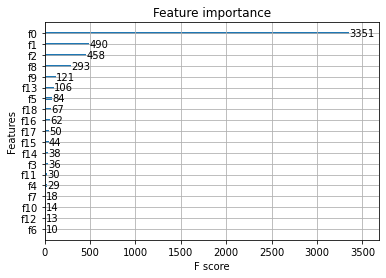

In [ ]:
plot_importance(xgb_clf)
plt.show()

## Testing

In [ ]:
f1_score = f1_score(y_true=y_test, y_pred=xgb_clf.predict(X_test_std), average='weighted')
best_score=0.9693
if f1_score > best_score:
  best_score = val_score
  export_model(xgb_clf, 'best_model')

print('Best Score:', 100*best_score,'%')

Best Score: 96.93 %


In [ ]:
scores = pd.DataFrame({}, columns=['F1 ','Recall','Accuracy'], index=['X-Gradient Boost', 'Random Forest'])

In [ ]:
scores.iloc[0]= pd.Series([f1_score(y_true=y_test, y_pred=xgb_clf.predict(X_test_std), average='weighted'),
                              recall_score(y_true=y_test, y_pred=xgb_clf.predict(X_test_std), average='weighted'),
                              accuracy_score(y_true=y_test, y_pred=xgb_clf.predict(X_test_std))                     
                                    ])
scores.iloc[1]= pd.Series([f1_score(y_true=y_test, y_pred=forest_classifier.predict(X_test_std), average='weighted'),
                              recall_score(y_true=y_test, y_pred=forest_classifier.predict(X_test_std), average='weighted'),
                              accuracy_score(y_true=y_test, y_pred=forest_classifier.predict(X_test_std))      
                                  ])

In [ ]:
scores

,F1,Recall,Accuracy
X-Gradient Boost,0.969207,0.969249,0.969249
Random Forest,0.891713,0.892508,0.892508


# Results



## Learning curves

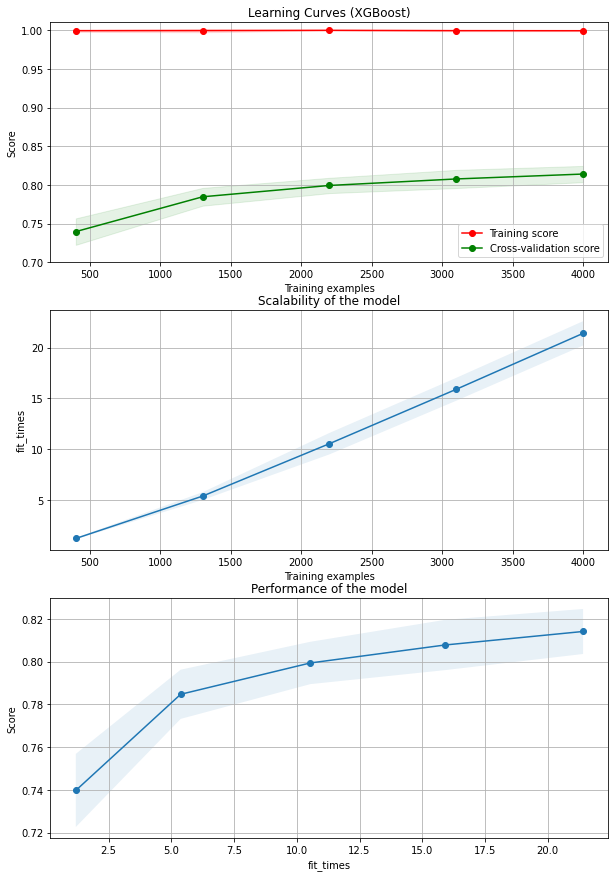

In [ ]:
X_std = sc.transform(X)
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

title = "Learning Curves (XGBoost)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

estimator = xgb_clf
plot_learning_curve(
    estimator,
    title,
    X_std,
    y,
    axes=axes,
    ylim=(0.7, 1.01),
    cv=cv,
    n_jobs=-1,
    scoring="accuracy",
)

plt.show()

In [ ]:
fig.savefig('/content/drive/MyDrive/RNA-taxonomy-detection/Results/images/XGB_learning_curves.png', dpi=100)

## Confusion Matrix

In [ ]:
taxonomies = df['Taxonomy'].drop_duplicates()

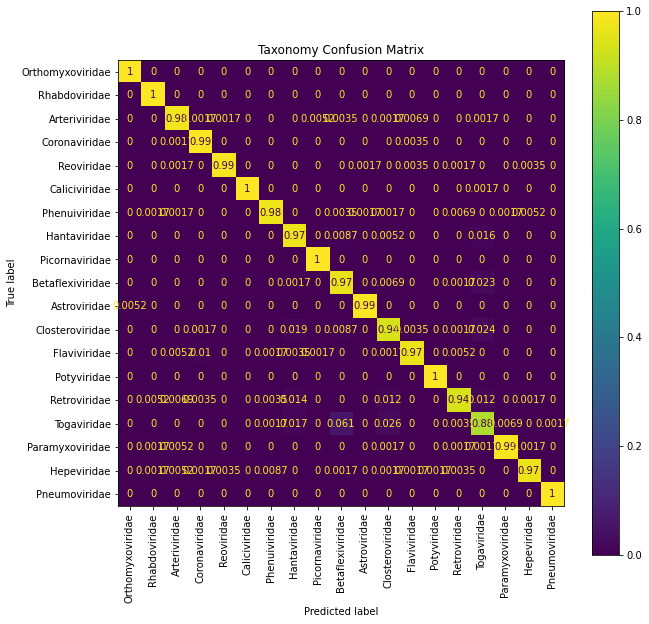

In [ ]:
y_pred = xgb_clf.predict(X_test_std)
cm = confusion_matrix(y_test, y_pred, normalize='true')
plot_cmat(cm, list(taxonomies))

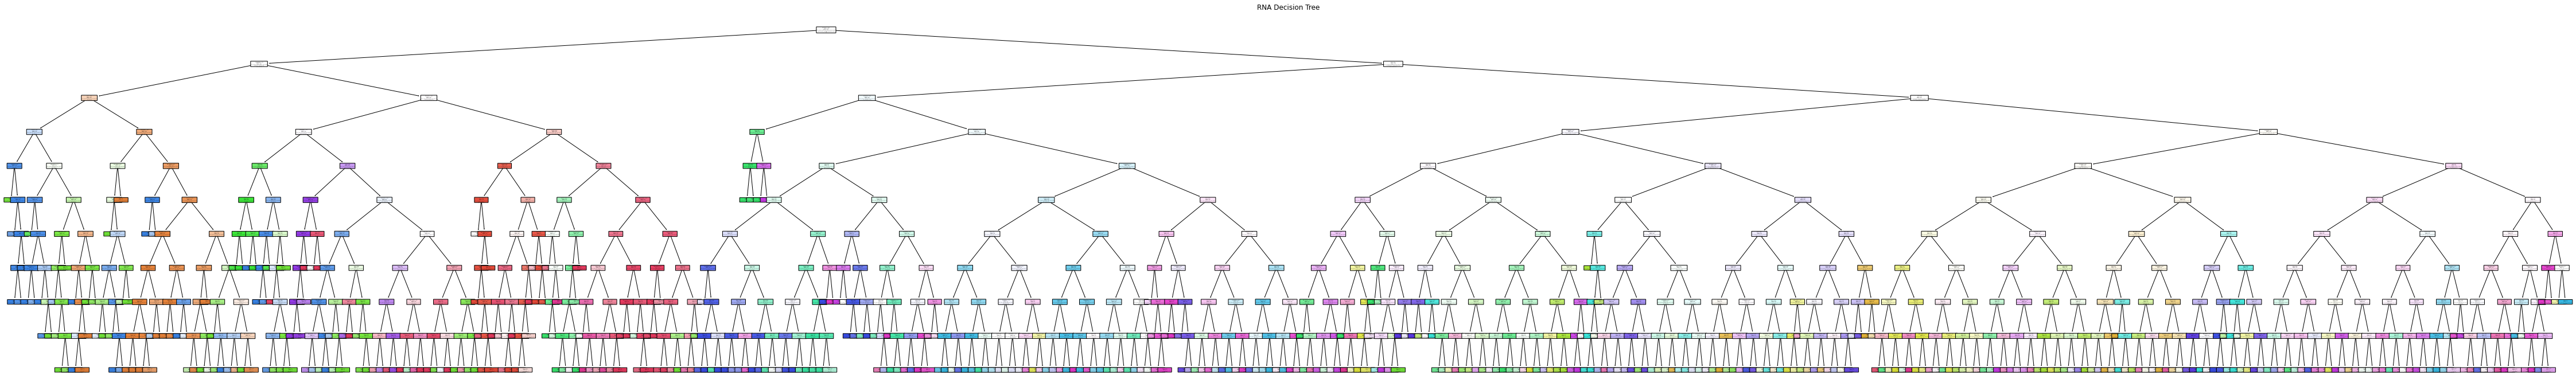

In [ ]:
tree = forest_classifier.estimators_[0]
fig = plt.figure(figsize=(80, 12))
plot_tree(tree, 
          feature_names=df.drop(['Taxonomy'], axis=1).columns,
          class_names=np.array(taxonomies), 
          filled=True, impurity=True, 
          rounded=True)
plt.title('RNA Decision Tree')
fig.savefig('/content/drive/MyDrive/RNA-taxonomy-detection/Results/images/decision_tree.svg', dpi=100)

# Model Selection

According with the test results, we've chosen the **X Gradient Boost** classifier, which archieves a **f1 score: 96.92%** on validation.

In [ ]:
export_model(xgb_clf, 'best_model')

# Model export

In [ ]:
def export_model(model, name):
  joblib.dump(model, '/content/drive/MyDrive/RNA-taxonomy-detection/Results/models/'+name+'.pkl')

# Model import

In [ ]:
forest_classifier = joblib.load('/content/drive/MyDrive/RNA-taxonomy-detection/Results/models/random_forest_model.pkl')

In [ ]:
xgb_clf = joblib.load('/content/drive/MyDrive/RNA-taxonomy-detection/Results/models/xgboost_model.pkl')

# DEMO

In [ ]:
taxonomies

0      Orthomyxoviridae
13        Rhabdoviridae
16        Arteriviridae
18        Coronaviridae
25           Reoviridae
26        Caliciviridae
36        Phenuiviridae
44         Hantaviridae
47       Picornaviridae
51     Betaflexiviridae
58         Astroviridae
62      Closteroviridae
65         Flaviviridae
76          Potyviridae
132        Retroviridae
148         Togaviridae
185     Paramyxoviridae
281         Hepeviridae
303       Pneumoviridae
Name: Taxonomy, dtype: object

In [ ]:
correct_taxonomy = 'Orthomyxoviridae'
arn_seq = ''.join(list(tax_data['Orthomyxoviridae'])[4])
print('ARN-Sequence: \n',arn_seq,'\n \n', 'Taxonomy: ', correct_taxonomy)

ARN-Sequence: 
 AGCAATCACAGCTCAGTGATCGAGACAATTAAACATTCCAACCATGGCAAACGCACCTAGGAAACCCCCAATACTCAGCGTGCCAGGTCCATCCGGTGGTAAACTTAAGTGTGCCACAGTGAACTATACGCAAGCAACCCACCAATTGATGTCTCTCACCGGTGACGTATTAAGAATCTTGGAGAAGAGGGACTCTGCTATTTCAGTGGAAGCCCGTGTAAAGGTCGTCGCCCTTAGGGATGCGTTTTACACTGATCTTCTCCCGGCTACAAACTGCGCTGAAGTCAAAAAGATACTTACAAACTTTGGAACCGCCATCATGTCCGTCATGGTGTCGCGGACGAATCCAGTGTACGGCTCTGCTCTCGACCCCCTTCAGGCAATCCTGATAAGATTCGCACAGGTTAACGCAGAGATTCCCGGCCTTCCCGACTGCCCTGTATGCACTTAGGTGCCTGGAAAAATATTTCTATTAGTTGCATGTCTGTTTTCTTTCTGGAAAAATGAGCTTGTGATTGC 
 
 Taxonomy:  Orthomyxoviridae


In [ ]:
classify(
    model=forest_classifier, 
    max_scaler=scaler, 
    std_scaler=sc, 
    arn_seq=arn_seq, 
    taxonomies=list(taxonomies), 
    codons=codons
    )

Predicted  Taxonomy:  Orthomyxoviridae
